In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
subject_num = 62

def read_data(n):  #read behavioral data; no action: action[i]=4
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    comparision = [] #r-r_b; 1:>=0, 0:<0
    num = str(220+n)
    file = pd.read_csv('E:/multi-bandit/task2v3/RLE2V3_data/' + num + '.csv')
    name = 'sub (' +str(n) +').csv'
    action_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in  range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    for i in range((file.shape[0])):

        if (file.iloc[i,0] == 1 or file.iloc[i,0] == 0) and file.iloc[i,action_index]!='None' :
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            if int(file.iloc[i,reward_index]) >= int(file.iloc[i,reward_index+1]):
                comparision.append(int(file.iloc[i,reward_index])-int(file.iloc[i,reward_index+1]))
            else:
                comparision.append(int(file.iloc[i,reward_index+1])-int(file.iloc[i,reward_index]))
        elif (file.iloc[i,0] == 1 or file.iloc[i,0] == 0)  and file.iloc[i,action_index] =='None' :
            action.append(4)
            reward.append(0)
            reward_B.append(0)
            comparision.append(0)
    return action,reward,reward_B,comparision

def read_data_task2(n):  #read behavioral data; no action: action[i]=4
    num = str(220+n)
    n_wrong = 0
    #数据文件在的位置
    action = []
    reward = []
    reward_B = []
    comparision = [] #r-r_b; 1:>=0, 0:<0
    expect_arm = []
    expect_reward = []
    expect_confidence = []
    ask = []
       
    file = pd.read_csv('E:/multi-bandit/task2v3/RLE2V3_data/' + num + '.csv')

    action_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    reward_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
            
    ask_reward_choose_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'expectself.text':
            ask_reward_choose_index = i
    ask_reward_random_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'expect_random_3.text':
            ask_reward_random_index = i
    ask_reward_confidence = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'slider_2.response':
            ask_reward_confidence = i

    whether_ask = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'whether_ask':
            whether_ask = i        
    ask_random_arm = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'random_whicharm':
            ask_random_arm = i  
        
    for i in range((file.shape[0])):
        if (file.iloc[i,0] == 1 or file.iloc[i,0] == 0) and file.iloc[i,action_index]!='None' :
            # print(i)
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))
            if int(file.iloc[i,reward_index]) >= int(file.iloc[i,reward_index+1]):
                comparision.append(int(file.iloc[i,reward_index])-int(file.iloc[i,reward_index+1]))
            else:
                comparision.append(int(file.iloc[i,reward_index+1])-int(file.iloc[i,reward_index]))
            
            if int(file.iloc[i,whether_ask])==0:
                if np.isnan(file.iloc[i,ask_reward_choose_index]):
                    n_wrong+=1
                    ask.append(2)
                    expect_arm.append(4)
                    expect_reward.append(0)
                    expect_confidence.append(1)
                else: 
                    ask.append(0)
                    expect_arm.append(action[len(action)-1])
                # if np.isnan(file.iloc[i,ask_reward_choose_index]):
                #     print(n,i)
                    expect_reward.append(int(file.iloc[i,ask_reward_choose_index]))
                    expect_confidence.append(float(file.iloc[i,ask_reward_confidence]))
            elif int(file.iloc[i,whether_ask])==1:
                if np.isnan(file.iloc[i,ask_reward_random_index]):
                    n_wrong+=1
                    ask.append(2)
                    expect_arm.append(4)
                    expect_reward.append(0)
                    expect_confidence.append(1)
                else: 
                    ask.append(1)
                    if float(file.iloc[i,ask_random_arm])==-0.6:
                        expect_arm.append(0)
                    elif float(file.iloc[i,ask_random_arm])==-0.2:
                        expect_arm.append(1)
                    elif float(file.iloc[i,ask_random_arm])==0.2:
                        expect_arm.append(2)
                    elif float(file.iloc[i,ask_random_arm])==0.6:
                        expect_arm.append(3)
                    else:
                        print('ERROR expect_arm')
                    expect_reward.append(int(file.iloc[i,ask_reward_random_index]))
                    expect_confidence.append(float(file.iloc[i,ask_reward_confidence]))
            elif int(file.iloc[i,whether_ask])==2 or int(file.iloc[i,whether_ask])==3:
                ask.append(2)
                expect_arm.append(4)
                expect_reward.append(0)
                expect_confidence.append(1)
            else:
                print('ERROR ask whether_whicharm')
                
                
        elif (file.iloc[i,0] == 1 or file.iloc[i,0] == 0)  and file.iloc[i,action_index] =='None' :
            action.append(4)
            reward.append(0)
            reward_B.append(0)
            comparision.append(0)
            expect_arm.append(4)
            expect_reward.append(0)
            expect_confidence.append(1)
            ask.append(2)
    print('subject: ',n,' n_wrong: ',n_wrong)
    return action,reward,reward_B,comparision,expect_arm,expect_reward,expect_confidence,ask

def read_data_task2_happiness(n):
    num = str(220+n)
    file = pd.read_csv('E:/multi-bandit/task2v3/RLE2V3_data/' + num + '.csv')
    action_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'choose_bandit.keys':
            action_index = i
    happiness_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'slider.response':
            happiness_index = i
    whether_ask = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'whether_ask':
            whether_ask = i 
    action = []
    reward = []
    reward_B = []

    reward_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'subchoose':
            reward_index = i
    
    happiness = []
    
    for i in range((file.shape[0])):
        if (file.iloc[i,0] == 1 or file.iloc[i,0] == 0) and file.iloc[i,action_index]!='None' and (int(file.iloc[i,whether_ask])==2 or int(file.iloc[i,whether_ask])==3) :
            
            # print(i)
            
            if file.iloc[i,action_index] == 'r':
                action.append(0)
            elif file.iloc[i,action_index] == 'f':
                action.append(1)
            elif file.iloc[i,action_index] == 'i':
                action.append(2)
            elif file.iloc[i,action_index] == 'j':
                action.append(3)
            else:
                print(file.iloc[i,action_index])
                print(i)
                raise ValueError('不能识别选项')
            reward.append(int(file.iloc[i,reward_index]))
            reward_B.append(int(file.iloc[i,reward_index+1]))

            happiness.append(int(float(file.iloc[i,happiness_index])))
    return action,reward,reward_B,happiness

def read_true_reward_distribution(n):
    num = str(220+n)
    file = pd.read_csv('E:/multi-bandit/task2v3/RLE2V3_data/' + num + '.csv')
    reward_0 = []
    reward_1 = []
    reward_2 = []
    reward_3 = []
    
    yellow_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'rewardyellow':
            yellow_index = i
    red_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'rewardred':
            red_index = i
    blue_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'rewardblue':
            blue_index = i
    green_index = 0
    for i in range((file.shape[1])):
        if file.columns[i] == 'rewardgreen':
            green_index = i        
    
    for i in range((file.shape[0])):
        if (file.iloc[i,0] == 1 or file.iloc[i,0] == 0):
            reward_0.append(int(file.iloc[i,yellow_index]))
            reward_1.append(int(file.iloc[i,red_index]))
            reward_2.append(int(file.iloc[i,blue_index]))
            reward_3.append(int(file.iloc[i,green_index]))
    reward_true = np.array([reward_0,reward_1,reward_2,reward_3]).transpose()
    return reward_true

In [50]:
def rewards2comparison(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            comparison.append(com)
            com = reward[i] - reward_B[i] + gamma*com
        else:
            comparison.append(0)
            com = gamma*com
    return comparison

def rewards2comparison_sqrt(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            if com<0:
                comparison.append(-np.sqrt(-com))
            else:
                comparison.append(np.sqrt(com))
            com = reward[i] - reward_B[i] + gamma*com
        else:
            comparison.append(0)
            com = gamma*com
    return comparison

def rewards2comparison_sqrt_competition_learn(action,reward,reward_B,gamma):
    comparison = []
    com = 0
    for i in range(len(action)):
        if action[i]!=4:
            com = reward[i] - reward_B[i] + gamma*com
            if com<0:
                comparison.append(-np.sqrt(-com))
            else:
                comparison.append(np.sqrt(com))
        else:
            comparison.append(0)
            com = gamma*com
    return comparison

def subjective_normative():
    # subjects = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
    subjects = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    
    v_subjective = []
    v_normative = []
    v_true = []
    uncer_subject = []
    uncer_normative = []
    
    regression_reward = []
    regression_playerb = []
    regression_comparison = []
    
    arm = []
    for s in subjects:
        action,reward,reward_B,_,expect_arm,expect_reward,expect_confidence,ask =read_data_task2(s)
        reward_true = read_true_reward_distribution(s)
        comparision = rewards2comparison(action,reward,reward_B,0)
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        v_subjective_sub = []
        v_normative_sub = []
        v_true_sub = []
        uncer_subject_sub = []
        uncer_normative_sub = []
        regression_reward_sub = []
        regression_comparison_sub = []
        expect_arm_sub = []
        for t in range(trials):
            if action[t]!=4:
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
                if ask[t]!=2 :
                    v_normative_sub.append(v)
                    uncer_normative_sub.append(sig)
                    v_true_sub.append(reward_true[t])
                    regression_reward_sub.append(reward[t])
                    regression_comparison_sub.append(comparision[t])
                    
                    
                    v_subjective_sub.append(expect_reward[t])
                    uncer_subject_sub.append(1/expect_confidence[t])
                    expect_arm_sub.append(expect_arm[t])
                
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        v_subjective.append(v_subjective_sub)
        v_normative.append(v_normative_sub)
        v_true.append(v_true_sub)
        uncer_subject.append(uncer_subject_sub)
        uncer_normative.append(uncer_normative_sub)
        
        arm.append(expect_arm_sub)
        
        regression_reward.append(regression_reward_sub)

        regression_comparison.append(regression_comparison_sub)
    return v_subjective,v_normative,v_true,uncer_subject,uncer_normative,regression_reward,regression_playerb,regression_comparison,arm

def subjective_true():
    subjects = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    
    v_subjective = []
    v_normative = []
    v_true = []
    regression_comparison = []
    
    arm = []
    for s in subjects:
        action,reward,reward_B,_,expect_arm,expect_reward,expect_confidence,ask =read_data_task2(s)
        reward_true = read_true_reward_distribution(s)
        comparision = rewards2comparison(action,reward,reward_B,0)
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        
        v_subjective_sub = []
        v_normative_sub = []
        v_true_sub = []

        regression_comparison_sub = []
        expect_arm_sub = []
        for t in range(trials):
            if action[t]!=4:
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
                
                if ask[t]!=1 and ask[t]!=2:
                    v_normative_sub.append(v)
                    v_true_sub.append(reward_true[t])
                    v_subjective_sub.append(expect_reward[t])
                    regression_comparison_sub.append(comparision[t])
                    expect_arm_sub.append(expect_arm[t])             
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        v_subjective.append(v_subjective_sub)
        v_normative.append(v_normative_sub)
        v_true.append(v_true_sub)
        
        arm.append(expect_arm_sub)
        regression_comparison.append(regression_comparison_sub)
    return v_subjective,v_true,regression_comparison,arm

def subjective_true_random():
    subjects = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    
    v_subjective = []
    v_normative = []
    v_true = []
    regression_comparison = []
    
    arm = []
    for s in subjects:
        action,reward,reward_B,_,expect_arm,expect_reward,expect_confidence,ask =read_data_task2(s)
        reward_true = read_true_reward_distribution(s)
        comparision = rewards2comparison(action,reward,reward_B,0)
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        
        v_subjective_sub = []
        v_normative_sub = []
        v_true_sub = []

        regression_comparison_sub = []
        expect_arm_sub = []
        for t in range(trials):
            if action[t]!=4:
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
                
                if ask[t]!=0 and ask[t]!=2:
                    v_normative_sub.append(v)
                    v_true_sub.append(reward_true[t])
                    v_subjective_sub.append(expect_reward[t])
                    regression_comparison_sub.append(comparision[t])
                    expect_arm_sub.append(expect_arm[t])             
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        v_subjective.append(v_subjective_sub)
        v_normative.append(v_normative_sub)
        v_true.append(v_true_sub)
        
        arm.append(expect_arm_sub)
        regression_comparison.append(regression_comparison_sub)
    return v_subjective,v_true,regression_comparison,arm

def happiness_reward():
    subjects = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    Reward = []
    Reward_b = []
    Happiness = []
    for s in subjects:
        action,reward,reward_B,happiness = read_data_task2_happiness(s)
        Reward.append(reward)
        Reward_b.append(reward_B)
        Happiness.append(happiness)
    return Reward,Reward_b,Happiness


In [226]:
reward,reward_B,happiness = happiness_reward()

In [30]:
beta_r = []
beta_r_b = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    happy = happiness[j]
    r = reward[j]
    r_b = reward_B[j]
    data = {'happy':happy,'r':r,'r_b':r_b}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r + r_b',data=data).fit()
    beta_r.append(lm.params['r'])
    beta_r_b.append(lm.params['r_b'])
    # if lm.pvalues['r']<=0.05:
    #     beta_r.append(lm.params['r'])
    # if lm.pvalues['r_b']<=0.05:
        # beta_r_b.append(lm.params['r_b'])
        
        
# data = {'happiness':happy,'r':r,'r_b':r_b}
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [265]:
# all
beta_r_task1 = [0.054200900755109804, 0.016928377355788, 0.054129272015211914, 0.03842224749864165, 0.09002636807914127, 0.08322765628353507, 0.0857949338894024, 0.017004220187376812, 0.10604751139645588, 0.045818030904746405, 0.1459860809613021, 0.0845284684187779, 0.012282640332357927, 0.06336002820330605, 0.0317633626983589, 0.034796115148707715, 0.06678597409903697, 0.07376262509263383, 0.09218386855926215, 0.03289925546939472, 0.053997156861578154, 0.05473467285118387, 0.021508180747108224, -0.009154385385404239, 0.05683374230580252, 0.03316011601374983, 0.05257124041782069, 0.06507508608603171, 0.05444568842565955, 0.09748031073703235, 0.05994802385441444, 0.09269968360969606, 0.06602327181641561, 0.05988044621726425, 0.07749734707628962, 0.06453865311400292, 0.07210695956645766, 0.03550021717954521, 0.08254882303799611, 0.02107492300382408, 0.07421690058278622, 0.061149237147041735, 0.11502487407834072, 0.0880829196711449, 0.09160573273206696, 0.059362926235522515]
beta_r_b_task1 = [-0.06154415675316256, -0.02973334723060366, -0.04548800912073197, -0.039149020950217585, -0.07909018904860879, -0.06736666759647811, -0.08041273932038125, -0.014562683008340526, -0.08308311656004588, -0.039974446162977885, -0.061546915364747, -0.05023060201389075, -0.017279109531628718, -0.04202876413316782, -0.018633254572803456, -0.03796790748094179, -0.008862316608134104, -0.060188035466495655, 0.024358991855473286, 0.009604762514747687, -0.03419591258550405, -0.029636295956225592, -0.026066048556814332, 0.013157280874847802, -0.03137498155843436, -0.015986761405698456, -0.06342845532852674, -0.06301888085740522, -0.031102603680815646, -0.05663270771071374, -8.51697158008478e-05, -0.06597728281631379, -0.062470063361421864, -0.022735347707345758, -0.030369069290405032, -0.06197134726857786, -0.024545047017916783, -0.0026962011438785363, -0.03487805471192636, 0.031044242134733557, -0.03165186165850915, -0.042788277228797605, -0.05178717024484023, -0.08114467706111923, -0.06598847059245964, -0.005684238179156698]

In [262]:
# p<=0.05
beta_r_task1 = [0.054200900755109804, 0.016928377355788, 0.054129272015211914, 0.03842224749864165, 0.09002636807914127, 0.08322765628353507, 0.0857949338894024, 0.017004220187376812, 0.10604751139645588, 0.045818030904746405, 0.1459860809613021, 0.0845284684187779, 0.012282640332357927, 0.06336002820330605, 0.0317633626983589, 0.034796115148707715, 0.06678597409903697, 0.07376262509263383, 0.09218386855926215, 0.03289925546939472, 0.053997156861578154, 0.05473467285118387, 0.021508180747108224, 0.05683374230580252, 0.03316011601374983, 0.05257124041782069, 0.06507508608603171, 0.05444568842565955, 0.09748031073703235, 0.05994802385441444, 0.09269968360969606, 0.06602327181641561, 0.05988044621726425, 0.07749734707628962, 0.06453865311400292, 0.07210695956645766, 0.03550021717954521, 0.08254882303799611, 0.02107492300382408, 0.07421690058278622, 0.061149237147041735, 0.11502487407834072, 0.0880829196711449, 0.09160573273206696, 0.059362926235522515]
beta_r_b_task1 = [-0.06154415675316256, -0.02973334723060366, -0.04548800912073197, -0.039149020950217585, -0.07909018904860879, -0.06736666759647811, -0.08041273932038125, -0.014562683008340526, -0.08308311656004588, -0.039974446162977885, -0.061546915364747, -0.05023060201389075, -0.017279109531628718, -0.04202876413316782, -0.018633254572803456, -0.03796790748094179, -0.060188035466495655, 0.024358991855473286, -0.03419591258550405, -0.029636295956225592, -0.026066048556814332, 0.013157280874847802, -0.03137498155843436, -0.015986761405698456, -0.06342845532852674, -0.06301888085740522, -0.031102603680815646, -0.05663270771071374, -0.06597728281631379, -0.062470063361421864, -0.022735347707345758, -0.030369069290405032, -0.06197134726857786, -0.024545047017916783, -0.03487805471192636, 0.031044242134733557, -0.03165186165850915, -0.042788277228797605, -0.05178717024484023, -0.08114467706111923, -0.06598847059245964]

In [34]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
beta_c = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    happy = happiness[j]
    r = reward[j]
    c= []
    for i in range(len(reward[j])):
        c.append(reward[j][i]-reward_B[j][i])
    data = {'happy':happy,'r':r,'c':c}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r + c',data=data).fit()
    # beta_r.append(lm.params['r'])
    # beta_c.append(lm.params['c'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
    if lm.pvalues['c']<=0.05:
        beta_c.append(lm.params['c'])
data = {'happiness':happy,'r':r,'c':c}
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [37]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    happy = happiness[j]
    r = reward[j]
    data = {'happy':happy,'r':r}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r',data=data).fit()
    # beta_r.append(lm.params['r'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [ ]:
reward,reward_B,happiness = happiness_reward()
beta_c = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    happy = happiness[j]
    c= []
    for i in range(len(reward[j])):
        c.append(reward[j][i]-reward_B[j][i])
    data = {'happy':happy,'c':c}
    data = pd.DataFrame(data)
    lm = ols('happy ~ c',data=data).fit()
    # beta_r.append(lm.params['r'])
    # beta_c.append(lm.params['c'])
    if lm.pvalues['c']<=0.05:
        beta_c.append(lm.params['c'])
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [25]:
# all
beta_r_task1 = [-0.007343255998052816, -0.012804969874815645, 0.008641262894479914, -0.0007267734515759641, 0.010936179030532556, 0.015860988687056717, 0.005382194569021203, 0.0024415371790362256, 0.022964394836410013, 0.0058435847417685535, 0.08443916559655519, 0.03429786640488712, -0.004996469199270761, 0.021331264070138238, 0.01313010812555547, -0.003171792332234062, 0.057923657490902995, 0.01357458962613814, 0.11654286041473529, 0.0425040179841424, 0.01980124427607409, 0.025098376894958266, -0.004557867809706083, 0.004002895489443627, 0.02545876074736814, 0.01717335460805135, -0.010857214910706124, 0.0020562052286265927, 0.023343084744843888, 0.040847603026318645, 0.05986285413861356, 0.02672240079338139, 0.0035532084549937002, 0.03714509850991847, 0.04712827778588459, 0.0025673058454251446, 0.04756191254854096, 0.03280401603566673, 0.047670768326069694, 0.05211916513855763, 0.04256503892427707, 0.01836095991824411, 0.06323770383350057, 0.0069382426100257615, 0.025617262139607362, 0.05367868805636586, -0.0001848416502321249, 0.0047556323998691665, 0.005219187736138395, 0.007898398439044576, 0.006528245847602866, -0.017566604870757643, 0.06509078637712826, 0.05678037982803379, -0.0014651819921018142, 0.05707680836613902, 0.02657192758619595, -0.022972181511582743, 0.002685085107420224, 0.008722144111164109]
beta_c_task1 = [0.061544156753162584, 0.029733347230603675, 0.0454880091207321, 0.03914902095021758, 0.07909018904860876, 0.06736666759647816, 0.08041273932038132, 0.014562683008340554, 0.0830831165600458, 0.039974446162977836, 0.061546915364746914, 0.05023060201389076, 0.01727910953162866, 0.04202876413316782, 0.018633254572803556, 0.037967907480941726, 0.008862316608133997, 0.06018803546649567, -0.024358991855473206, -0.009604762514747657, 0.03419591258550402, 0.029636295956225585, 0.02606604855681437, -0.01315728087484782, 0.031374981558434364, 0.01598676140569852, 0.06342845532852685, 0.06301888085740517, 0.031102603680815622, 0.056632707710713666, 8.516971580090332e-05, 0.06597728281631418, 0.06247006336142182, 0.02273534770734579, 0.03036906929040489, 0.061971347268577774, 0.024545047017916738, 0.0026962011438785224, 0.034878054711926315, -0.031044242134733533, 0.03165186165850915, 0.042788277228797626, 0.05178717024484033, 0.0811446770611191, 0.0659884705924598, 0.005684238179156691]

In [35]:
# p<=0.05
beta_r_task1 = [0.015860988687056717, 0.022964394836410013, 0.08443916559655519, 0.03429786640488712, 0.021331264070138238, 0.057923657490902995, 0.01357458962613814, 0.11654286041473529, 0.0425040179841424, 0.01980124427607409, 0.025098376894958266, 0.02545876074736814, 0.01717335460805135, 0.023343084744843888, 0.040847603026318645, 0.05986285413861356, 0.02672240079338139, 0.03714509850991847, 0.04712827778588459, 0.04756191254854096, 0.03280401603566673, 0.047670768326069694, 0.05211916513855763, 0.04256503892427707, 0.06323770383350057, 0.025617262139607362, 0.05367868805636586, 0.06509078637712826, 0.05678037982803379, 0.05707680836613902, 0.02657192758619595]
beta_c_task1 = [0.061544156753162584, 0.029733347230603675, 0.0454880091207321, 0.03914902095021758, 0.07909018904860876, 0.06736666759647816, 0.08041273932038132, 0.014562683008340554, 0.0830831165600458, 0.039974446162977836, 0.061546915364746914, 0.05023060201389076, 0.01727910953162866, 0.04202876413316782, 0.018633254572803556, 0.037967907480941726, 0.06018803546649567, -0.024358991855473206, 0.03419591258550402, 0.029636295956225585, 0.02606604855681437, -0.01315728087484782, 0.031374981558434364, 0.01598676140569852, 0.06342845532852685, 0.06301888085740517, 0.031102603680815622, 0.056632707710713666, 0.06597728281631418, 0.06247006336142182, 0.02273534770734579, 0.03036906929040489, 0.061971347268577774, 0.024545047017916738, 0.034878054711926315, -0.031044242134733533, 0.03165186165850915, 0.042788277228797626, 0.05178717024484033, 0.0811446770611191, 0.0659884705924598]

In [221]:
# single varible p<=0.05
beta_r_task1 = [0.05594754822369834, 0.02504336935358145, 0.06690377516044907, 0.0388828959080581, 0.09255547602004294, 0.08880143281330995, 0.09091213266941846, 0.019048905560238045, 0.09877500563249703, 0.047862580278879185, 0.14287661721076234, 0.07033924037352855, 0.012393383640115281, 0.07112573941204262, 0.029896833357214506, 0.03040620345846431, 0.06744041201444849, 0.067045238100532, 0.09460612108034946, 0.03368003544773852, 0.05756612145782165, 0.05407755408085139, 0.021072608827927698, 0.054150242243017566, 0.03162031427404478, 0.06797391613464653, 0.07208273199078631, 0.05767286619285421, 0.10501010039871983, 0.05993887796112641, 0.08778148514955975, 0.06529787606929294, 0.05983590582440814, 0.07324004226529536, 0.05853356718001686, 0.07873221477668739, 0.03535113395173634, 0.07984430620240418, 0.02215816355027089, 0.08012732810614097, 0.0625173018992201, 0.11227078583127276, 0.08486894991146042, 0.10204477536995205, 0.0594998585394989]
beta_b_task1 = [0.054200900755109804, 0.016928377355788, 0.054129272015211914, 0.03842224749864165, 0.09002636807914127, 0.08322765628353507, 0.0857949338894024, 0.017004220187376812, 0.10604751139645588, 0.045818030904746405, 0.1459860809613021, 0.0845284684187779, 0.012282640332357927, 0.06336002820330605, 0.0317633626983589, 0.034796115148707715, 0.06678597409903697, 0.07376262509263383, 0.09218386855926215, 0.03289925546939472, 0.053997156861578154, 0.05473467285118387, 0.021508180747108224, -0.009154385385404239, 0.05683374230580252, 0.03316011601374983, 0.05257124041782069, 0.06507508608603171, 0.05444568842565955, 0.09748031073703235, 0.05994802385441444, 0.09269968360969606, 0.06602327181641561, 0.05988044621726425, 0.07749734707628962, 0.06453865311400292, 0.07210695956645766, 0.03550021717954521, 0.08254882303799611, 0.02107492300382408, 0.07421690058278622, 0.061149237147041735, 0.11502487407834072, 0.0880829196711449, 0.09160573273206696, 0.059362926235522515]

In [31]:
# all beta_r beta_b
beta_r_task1 = [0.054200900755109804, 0.016928377355788, 0.054129272015211914, 0.03842224749864165, 0.09002636807914127, 0.08322765628353507, 0.0857949338894024, 0.017004220187376812, 0.10604751139645588, 0.045818030904746405, 0.1459860809613021, 0.0845284684187779, 0.012282640332357927, 0.06336002820330605, 0.0317633626983589, 0.034796115148707715, 0.06678597409903697, 0.07376262509263383, 0.09218386855926215, 0.03289925546939472, 0.053997156861578154, 0.05473467285118387, 0.021508180747108224, -0.009154385385404239, 0.05683374230580252, 0.03316011601374983, 0.05257124041782069, 0.06507508608603171, 0.05444568842565955, 0.09748031073703235, 0.05994802385441444, 0.09269968360969606, 0.06602327181641561, 0.05988044621726425, 0.07749734707628962, 0.06453865311400292, 0.07210695956645766, 0.03550021717954521, 0.08254882303799611, 0.02107492300382408, 0.07421690058278622, 0.061149237147041735, 0.11502487407834072, 0.0880829196711449, 0.09160573273206696, 0.059362926235522515, 0.04948312192391225, 0.02916342468746113, 0.018973158637804285, 0.04397415333341222, 0.051588662475751265, 0.08977257118040534, 0.09370212507016781, 0.08656664093560895, 0.10944172592928887, 0.09634365628483142, 0.05167562395019069, 0.08717760498980447, 0.06458034389582372, 0.05446492167414249]

In [285]:
# single varible all
beta_r_task1 = [0.05594754822369834, 0.02504336935358145, 0.06690377516044907, 0.0388828959080581, 0.09255547602004294, 0.08880143281330995, 0.09091213266941846, 0.019048905560238045, 0.09877500563249703, 0.047862580278879185, 0.14287661721076234, 0.07033924037352855, 0.012393383640115281, 0.07112573941204262, 0.029896833357214506, 0.03040620345846431, 0.06744041201444849, 0.067045238100532, 0.09460612108034946, 0.03368003544773852, 0.05756612145782165, 0.05407755408085139, 0.021072608827927698, -0.0070652635893518785, 0.054150242243017566, 0.03162031427404478, 0.06797391613464653, 0.07208273199078631, 0.05767286619285421, 0.10501010039871983, 0.05993887796112641, 0.08778148514955975, 0.06529787606929294, 0.05983590582440814, 0.07324004226529536, 0.05853356718001686, 0.07873221477668739, 0.03535113395173634, 0.07984430620240418, 0.02215816355027089, 0.08012732810614097, 0.0625173018992201, 0.11227078583127276, 0.08486894991146042, 0.10204477536995205, 0.0594998585394989]

In [27]:
def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p

In [38]:
print(get_p_value(beta_r, beta_r_task1))

4.177817849369797e-06


In [46]:
reward,reward_B,happiness = happiness_reward()
beta_r = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    happy = happiness[j]
    r = reward[j]
    data = {'happy':happy,'r':r}
    data = pd.DataFrame(data)
    lm = ols('happy ~ r',data=data).fit()
    # beta_r.append(lm.params['r'])
    if lm.pvalues['r']<=0.05:
        beta_r.append(lm.params['r'])
# data = pd.DataFrame(data)
# lm = ols('happy ~ r + r_b',data=data).fit()
# lm.summary()

In [45]:
a = [0.05594754822369834, 0.02504336935358145, 0.06690377516044907, 0.0388828959080581, 0.09255547602004294, 0.08880143281330995, 0.09091213266941846, 0.019048905560238045, 0.09877500563249703, 0.047862580278879185, 0.14287661721076234, 0.07033924037352855, 0.012393383640115281, 0.07112573941204262, 0.029896833357214506, 0.03040620345846431, 0.06744041201444849, 0.067045238100532, 0.09460612108034946, 0.03368003544773852, 0.05756612145782165, 0.05407755408085139, 0.021072608827927698, 0.054150242243017566, 0.03162031427404478, 0.06797391613464653, 0.07208273199078631, 0.05767286619285421, 0.10501010039871983, 0.05993887796112641, 0.08778148514955975, 0.06529787606929294, 0.05983590582440814, 0.07324004226529536, 0.05853356718001686, 0.07873221477668739, 0.03535113395173634, 0.07984430620240418, 0.02215816355027089, 0.08012732810614097, 0.0625173018992201, 0.11227078583127276, 0.08486894991146042, 0.10204477536995205, 0.0594998585394989, 0.04524243269075282, 0.027250451307349093, 0.022183889913286802, 0.0505107277259176, 0.05166424281807469, 0.09515651572887589, 0.0914956125975743, 0.08168826835653717, 0.10707922104163767, 0.09183290621365339, 0.054970644053264225, 0.09123144659057483, 0.07511158431871415, 0.053771593628966066]

In [47]:
print(get_p_value(beta_r, a))

0.1114655837421971


In [280]:
print(get_p_value(beta_r, beta_r_task1))
print(get_p_value(beta_c, beta_c_task1))

0.05822307298622761
0.6926876575160936


In [266]:
print(get_p_value(beta_r, beta_r_task1))
print(get_p_value(beta_r_b, beta_r_b_task1))

0.06828298170951579
0.6926876575160932


In [317]:
r = []
c = []
happy = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(happiness[subject])):
        r.append(reward[subject][i])
        c.append(reward_B[subject][i])
        happy.append(happiness[subject][i])
data = {'happiness':happy,'r':r,'c':c}
data = pd.DataFrame(data)
lm = ols('happy ~ r + c',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1231.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:32:07   Log-Likelihood:                -5859.9
No. Observations:                3339   AIC:                         1.173e+04
Df Residuals:                    3336   BIC:                         1.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7672      0.125     22.222      0.000       2.523       3.011
r              0.0655      0.002     43.589      0.000       0.063       0.068
c             -0.0380      0.002    -24.122      0.000      -0.041      -0.035
==============================================================================
Omnibus:                        4.438   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.392
Skew:                          -0.088   Prob(JB):                        0.111
Kurtosis:                       3.028   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
r = []
r_b = []
happy = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(happiness[subject])):
        r.append(reward[subject][i])
        r_b.append(reward_B[subject][i])
        happy.append(happiness[subject][i])
data = {'happiness':happy,'r':r,'r_b':r_b}
data = pd.DataFrame(data)
lm = ols('happy ~ r + r_b',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1231.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:28:49   Log-Likelihood:                -5859.9
No. Observations:                3339   AIC:                         1.173e+04
Df Residuals:                    3336   BIC:                         1.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7672      0.125     22.222      0.000       2.523       3.011
r              0.0655      0.002     43.589      0.000       0.063       0.068
r_b           -0.0380      0.002    -24.122      0.000      -0.041      -0.035
==============================================================================
Omnibus:                        4.438   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.392
Skew:                          -0.088   Prob(JB):                        0.111
Kurtosis:                       3.028   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
v_subjective,v_normative,v_true,uncer_subject,uncer_normative,regression_reward,regression_playerb,regression_comparison,arm = subjective_normative()

subject:  1  n_wrong:  0
subject:  2  n_wrong:  0
subject:  3  n_wrong:  0
subject:  4  n_wrong:  0
subject:  5  n_wrong:  3
subject:  7  n_wrong:  0
subject:  8  n_wrong:  1
subject:  9  n_wrong:  0
subject:  10  n_wrong:  0
subject:  11  n_wrong:  0
subject:  12  n_wrong:  0
subject:  13  n_wrong:  0
subject:  14  n_wrong:  0
subject:  15  n_wrong:  0
subject:  16  n_wrong:  0
subject:  17  n_wrong:  0
subject:  18  n_wrong:  0
subject:  19  n_wrong:  0
subject:  20  n_wrong:  0
subject:  21  n_wrong:  0
subject:  22  n_wrong:  0
subject:  23  n_wrong:  0
subject:  24  n_wrong:  0
subject:  25  n_wrong:  0
subject:  26  n_wrong:  0
subject:  27  n_wrong:  0
subject:  28  n_wrong:  0
subject:  29  n_wrong:  0
subject:  30  n_wrong:  0
subject:  31  n_wrong:  0
subject:  32  n_wrong:  0
subject:  33  n_wrong:  0
subject:  34  n_wrong:  0
subject:  35  n_wrong:  0
subject:  37  n_wrong:  0
subject:  38  n_wrong:  0
subject:  39  n_wrong:  0
subject:  40  n_wrong:  0
subject:  41  n_wron

In [105]:
# all subjects 'v_subjective ~ v_normative(b:0.3340 p:0.000) + comparison(b:0.0957 p:0.000)' 
# subject1  'v_subjective ~ v_normative(b:0.0278 p:0.749) + comparison(b:0.0271 p:0.768)' 
# subject2  'v_subjective ~ v_normative(b:0.4913 p:0.001) + comparison(b:0.1255 p:0.074)' 
# subject3  'v_subjective ~ v_normative(b:0.0197 p:0.866) + comparison(b:-0.120 p:0.078)' 
# subject4  'v_subjective ~ v_normative(b:0.4994 p:0.000) + comparison(b:0.0071 p:0.904)' 
# subject5  'v_subjective ~ v_normative(b:0.0182 p:0.939) + comparison(b:0.2263 p:0.071)' 
# subject6  'v_subjective ~ v_normative(b:-0.163 p:0.226) + comparison(b:-0.044 p:0.515)' 
# subject7  'v_subjective ~ v_normative(b:0.0146 p:0.957) + comparison(b:0.2535 p:0.043)' 
# subject8  'v_subjective ~ v_normative(b:0.9893 p:0.001) + comparison(b:0.2450 p:0.002)' 
# subject9  'v_subjective ~ v_normative(b:0.1831 p:0.572) + comparison(b:0.1471 p:0.183)' 
# subject10  'v_subjective ~ v_normative(b:0.3788 p:0.000) + comparison(b:-0.136 p:0.101)' 
# subject11  'v_subjective ~ v_normative(b:0.9686 p:0.000) + comparison(b:-0.018 p:0.856)' 
# subject12  'v_subjective ~ v_normative(b:0.8231 p:0.000) + comparison(b:0.1089 p:0.246)' 
# subject13  'v_subjective ~ v_normative(b:0.1358 p:0.168) + comparison(b:0.4778 p:0.000)' 
# subject14  'v_subjective ~ v_normative(b:0.6578 p:0.000) + comparison(b:0.1905 p:0.002)' 
# subject15  'v_subjective ~ v_normative(b:-0.246 p:0.011) + comparison(b:0.0362 p:0.615)' 
# subject16  'v_subjective ~ v_normative(b:0.5067 p:0.001) + comparison(b:0.0572 p:0.601)' 
# subject17  'v_subjective ~ v_normative(b:0.2033 p:0.047) + comparison(b:0.4622 p:0.000)' 
# subject18  'v_subjective ~ v_normative(b:0.1579 p:0.612) + comparison(b:0.2002 p:0.131)' 
# subject19  'v_subjective ~ v_normative(b:0.0697 p:0.617) + comparison(b:0.1252 p:0.070)'
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 
# subject  'v_subjective ~ v_normative(b: p:) + comparison(b: p:)' 


In [17]:
V_subject = []
comparison = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(v_subjective[subject])):
        V_subject.append(v_subjective[subject][i])
        comparison.append(regression_comparison[subject][i])
data = {'v_subjective':V_subject,'comparison':comparison}
data = pd.DataFrame(data)
lm = ols('v_subjective ~ comparison',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           v_subjective   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     76.62
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.84e-18
Time:                        09:02:06   Log-Likelihood:                -20378.
No. Observations:                4711   AIC:                         4.076e+04
Df Residuals:                    4709   BIC:                         4.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7864      0.267    212.731      0.000      56.263      57.310
comparison     0.1059      0.012      8.753      0.000       0.082       0.130
==============================================================================
Omnibus:                        8.505   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.747
Skew:                          -0.056   Prob(JB):                       0.0208
Kurtosis:                       2.836   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
V_subject = []
V_normative = []
comparison = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(v_subjective[subject])):
        V_subject.append(v_subjective[subject][i])
        V_normative.append(v_normative[subject][i][arm[subject][i]])
        comparison.append(regression_comparison[subject][i])
data = {'v_subjective':V_subject,'v_normative':V_normative,'comparison':comparison}
data = pd.DataFrame(data)
lm = ols('v_subjective ~ v_normative + comparison',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           v_subjective   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.61e-77
Time:                        09:03:41   Log-Likelihood:                -20239.
No. Observations:                4711   AIC:                         4.048e+04
Df Residuals:                    4708   BIC:                         4.050e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.5297      0.996     40.709      0.000      38.578      42.482
v_normative     0.3095      0.018     16.912      0.000       0.274       0.345
comparison      0.0817      0.012      6.901      0.000       0.058       0.105
==============================================================================
Omnibus:                        6.099   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.048
Skew:                          -0.082   Prob(JB):                       0.0486
Kurtosis:                       3.061   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# all_subjects 'v_subjective ~ v_true(b:0.5889 p:0.000) + comparison(b:-0.005 p:0.717)' 
# subject1  'v_subjective ~ v_true(b:0.2257 p:0.073) + comparison(b:0.0153 p:0.864)' 
# subject2  'v_subjective ~ v_true(b:0.4017 p:0.000) + comparison(b:0.0513 p:0.466)' 
# subject3  'v_subjective ~ v_true(b:0.0940 p:0.491) + comparison(b:-0.124 p:0.066)' 
# subject4  'v_subjective ~ v_true(b:0.7685 p:0.000) + comparison(b:-0.049 p:0.323)' 
# subject5  'v_subjective ~ v_true(b:0.2687 p:0.115) + comparison(b:0.1812 p:0.143)' 
# subject7  'v_subjective ~ v_true(b:-0.027 p:0.771) + comparison(b:-0.047 p:0.492)' 
# subject8  'v_subjective ~ v_true(b:0.0686 p:0.726) + comparison(b:0.2489 p:0.047)' 
# subject9  'v_subjective ~ v_true(b:0.9224 p:0.000) + comparison(b:0.0004 p:0.993)' 
# subject10  'v_subjective ~ v_true(b:0.3871 p:0.004) + comparison(b:0.0675 p:0.528)' 
# subject11  'v_subjective ~ v_true(b:0.6681 p:0.000) + comparison(b:-0.114 p:0.068)' 
# subject12  'v_subjective ~ v_true(b:0.5621 p:0.000) + comparison(b:-0.060 p:0.530)' 
# subject13  'v_subjective ~ v_true(b:0.5940 p:0.000) + comparison(b:0.1392 p:0.150)' 
# subject14  'v_subjective ~ v_true(b:0.7349 p:0.000) + comparison(b:0.1877 p:0.016)' 
# subject15  'v_subjective ~ v_true(b:0.9035 p:0.000) + comparison(b:0.0737 p:0.097)' 
# subject16  'v_subjective ~ v_true(b:0.6849 p:0.000) + comparison(b:0.0079 p:0.888)' 
# subject17  'v_subjective ~ v_true(b:0.9173 p:0.000) + comparison(b:-0.042 p:0.576)' 
# subject18  'v_subjective ~ v_true(b:0.9873 p:0.000) + comparison(b:0.0851 p:0.263)' 
# subject19  'v_subjective ~ v_true(b:0.2928 p:0.259) + comparison(b:0.1976 p:0.133)' 
# subject20  'v_subjective ~ v_true(b:0.6861 p:0.000) + comparison(b:0.0749 p:0.044)' 
# subject21  'v_subjective ~ v_true(b:0.4808 p:0.000) + comparison(b:0.2859 p:0.006)' 
# subject22  'v_subjective ~ v_true(b:0.6781 p:0.000) + comparison(b:0.0003 p:0.995)' 
# subject23  'v_subjective ~ v_true(b:0.8487 p:0.000) + comparison(b:0.0706 p:0.145)' 
# subject24  'v_subjective ~ v_true(b:0.7057 p:0.000) + comparison(b:-0.014 p:0.893)' 
# subject25  'v_subjective ~ v_true(b:0.8044 p:0.000) + comparison(b:-0.012 p:0.859)' 
# subject26  'v_subjective ~ v_true(b:0.6288 p:0.000) + comparison(b:0.0618 p:0.373)' 
# subject27  'v_subjective ~ v_true(b:0.9369 p:0.000) + comparison(b:-0.100 p:0.199)' 
# subject28  'v_subjective ~ v_true(b:0.6470 p:0.000) + comparison(b:-0.060 p:0.287)' 
# subject29  'v_subjective ~ v_true(b:0.7041 p:0.000) + comparison(b:-0.029 p:0.750)' 
# subject30  'v_subjective ~ v_true(b:0.1422 p:0.141) + comparison(b:0.0238 p:0.702)' 
# subject31  'v_subjective ~ v_true(b:0.6245 p:0.000) + comparison(b:0.0170 p:0.688)' 
# subject32  'v_subjective ~ v_true(b:0.6652 p:0.000) + comparison(b:0.0018 p:0.023)' 
# subject33  'v_subjective ~ v_true(b:0.8811 p:0.000) + comparison(b:-0.060 p:0.102)' 
# subject34  'v_subjective ~ v_true(b:0.6513 p:0.000) + comparison(b:-0.006 p:0.954)' 
# subject35  'v_subjective ~ v_true(b:0.5567 p:0.009) + comparison(b:-0.073 p:0.618)' 
# subject36  'v_subjective ~ v_true(b:0.7342 p:0.000) + comparison(b:0.0252 p:0.634)' 
# subject37  'v_subjective ~ v_true(b:0.2529 p:0.076) + comparison(b:0.0157 p:0.899)' 
# subject38  'v_subjective ~ v_true(b:0.2373 p:0.139) + comparison(b:0.2040 p:0.070)' 
# subject39  'v_subjective ~ v_true(b:0.8125 p:0.000) + comparison(b:0.0331 p:0.628)' 
# subject40  'v_subjective ~ v_true(b:0.2782 p:0.010) + comparison(b:0.1324 p:0.092)' 
# subject41  'v_subjective ~ v_true(b:0.4845 p:0.000) + comparison(b:0.0089 p:0.910)' 
# subject42  'v_subjective ~ v_true(b:0.8096 p:0.000) + comparison(b:0.0328 p:0.322)' 
# subject43  'v_subjective ~ v_true(b:0.2578 p:0.183) + comparison(b:-0.026 p:0.848)' 
# subject44  'v_subjective ~ v_true(b:0.5166 p:0.000) + comparison(b:0.1101 p:0.136)' 
# subject45  'v_subjective ~ v_true(b:0.8264 p:0.000) + comparison(b:-0.364 p:0.014)' 
# subject46  'v_subjective ~ v_true(b:0.6220 p:0.011) + comparison(b:0.1915 p:0.153)' 
# subject47  'v_subjective ~ v_true(b:0.3581 p:0.005) + comparison(b:0.0177 p:0.823)' 

In [5]:
V_subject,V_true,comparison = [],[],[]
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(v_subjective[subject])):
        V_subject.append(v_subjective[subject][i])
        V_true.append(v_true[subject][i][arm[subject][i]])
        comparison.append(regression_comparison[subject][i])
data = {'v_subjective':V_subject,'v_true':V_true,'comparison':comparison}
data = pd.DataFrame(data)
lm = ols('v_subjective ~ v_true + comparison',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           v_subjective   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     978.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:59:40   Log-Likelihood:                -19597.
No. Observations:                4711   AIC:                         3.920e+04
Df Residuals:                    4708   BIC:                         3.922e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1186      0.815     28.376      0.000      21.521      24.716
v_true         0.6327      0.015     43.015      0.000       0.604       0.662
comparison    -0.0056      0.011     -0.527      0.598      -0.026       0.015
==============================================================================
Omnibus:                      287.140   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.939
Skew:                           0.376   Prob(JB):                    2.75e-147
Kurtosis:                       4.695   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
V_subject,V_true,comparison = [],[],[]
v_di = []
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(v_subjective[subject])):
        v_di.append(v_true[subject][i][arm[subject][i]]-v_subjective[subject][i])
        # V_subject.append(v_subjective[subject][i])
        # V_true.append(v_true[subject][i][arm[subject][i]])
        comparison.append(regression_comparison[subject][i])
data = {'v_di':v_di,'comparison':comparison}
data = pd.DataFrame(data)
lm = ols('v_di ~ comparison',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   v_di   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     41.53
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.28e-10
Time:                        23:01:00   Log-Likelihood:                -19890.
No. Observations:                4711   AIC:                         3.978e+04
Df Residuals:                    4709   BIC:                         3.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5722      0.241    -14.842      0.000      -4.044      -3.100
comparison     0.0703      0.011      6.444      0.000       0.049       0.092
==============================================================================
Omnibus:                      572.664   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1803.721
Skew:                          -0.626   Prob(JB):                         0.00
Kurtosis:                       5.761   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# all_subject ('uncer_subjective ~ uncer_normative(b:0.0039 p:0.000) + comparison(b:-0.002 p:0.000)')
# subject1 ('uncer_subjective ~ uncer_normative(b:0.0176 p:0.093) + comparison(b:-0.001 p:0.483)')
# subject2 ('uncer_subjective ~ uncer_normative(b:0.0000 p:0.963) + comparison(b:-0.000 p:0.497)')
# subject3 ('uncer_subjective ~ uncer_normative(b:0.0115 p:0.000) + comparison(b:-0.001 p:0.093)')
# subject4 ('uncer_subjective ~ uncer_normative(b:-0.000 p:0.835) + comparison(b:-0.001 p:0.000)')
# subject5 ('uncer_subjective ~ uncer_normative(b:0.0134 p:0.000) + comparison(b:-0.002 p:0.054)')
# subject6 ('uncer_subjective ~ uncer_normative(b:-0.004 p:0.844) + comparison(b:-0.001 p:0.162)')
# subject7 ('uncer_subjective ~ uncer_normative(b:-0.002 p:0.097) + comparison(b:-0.000 p:0.582)')
# subject8 ('uncer_subjective ~ uncer_normative(b:0.0098 p:0.119) + comparison(b:-0.002 p:0.006)')
# subject9 ('uncer_subjective ~ uncer_normative(b:-0.006 p:0.584) + comparison(b:0.0051 p:0.000)')
# subject10 ('uncer_subjective ~ uncer_normative(b:0.0004 p:0.902) + comparison(b:-0.003 p:0.000)')
# subject11 ('uncer_subjective ~ uncer_normative(b:0.0024 p:0.002) + comparison(b:-0.000 p:0.672)')
# subject12 ('uncer_subjective ~ uncer_normative(b:0.0043 p:0.232) + comparison(b:0.0022 p:0.006)')
# subject13 ('uncer_subjective ~ uncer_normative(b:0.0346 p:0.000) + comparison(b:-0.001 p:0.346)')
# subject14 ('uncer_subjective ~ uncer_normative(b:0.0026 p:0.012) + comparison(b:-0.001 p:0.029)')
# subject15 ('uncer_subjective ~ uncer_normative(b:0.0009 p:0.060) + comparison(b:-0.000 p:0.027)')
# subject16 ('uncer_subjective ~ uncer_normative(b:0.0002 p:0.844) + comparison(b:-0.001 p:0.094)')
# subject17 ('uncer_subjective ~ uncer_normative(b:-0.006 p:0.476) + comparison(b:-0.001 p:0.325)')
# subject18 ('uncer_subjective ~ uncer_normative(b:0.0032 p:0.090) + comparison(b:-0.001 p:0.011)')
# subject19 ('uncer_subjective ~ uncer_normative(b:0.0075 p:0.631) + comparison(b:-0.001 p:0.239)')
# subject20 ('uncer_subjective ~ uncer_normative(b:0.0211 p:0.000) + comparison(b:0.0000 p:0.750)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')
# subject ('uncer_subjective ~ uncer_normative(b: p:) + comparison(b: p:)')


In [311]:
print(np.mean(u_subject))

0.22741297795644677


In [312]:
print(np.mean(u_normative))

5.0043093882684735


In [314]:
print(np.mean(c_abs))

17.19863208891422


In [7]:
u_subject,u_normative,comparison,c_abs = [],[],[],[]
subjects = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
            46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
for j in subjects:
    subject = j
    for i in range(len(v_subjective[subject])):
        u_subject.append(uncer_subject[subject][i])
        u_normative.append(uncer_normative[subject][i][arm[subject][i]])
        comparison.append(regression_comparison[subject][i])
        c_abs.append(np.abs(regression_comparison[subject][i]))
data = {'uncer_subjective':u_subject,'uncer_normative':u_normative,'comparison':comparison}
data = pd.DataFrame(data)
lm = ols('uncer_subjective ~ uncer_normative + comparison',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       uncer_subjective   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     68.04
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           7.39e-30
Time:                        09:39:25   Log-Likelihood:                 871.04
No. Observations:                4711   AIC:                            -1736.
Df Residuals:                    4708   BIC:                            -1717.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2008      0.005     37.977      0.000       0.190       0.211
uncer_normative     0.0042      0.001      4.762      0.000       0.002       0.006
comparison         -0.0015      0.000    -11.151      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     2542.976   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14381.138
Skew:                           2.662   Prob(JB):                         0.00
Kurtosis:                       9.702   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
def read_parameter_3_para(file_name):
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    para1 = []
    para2 = []
    para3 = []
    for i in range(subject_num):
        para1.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        para2.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        para3.append(parameter_result.iloc[i+subject_num*2,1])
    para1 = np.array(para1)
    para2 = np.array(para2)
    para3 = np.array(para3)
    return para1,para2,para3
    
def read_parameter(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    return beta,phi,persev,gamma

def read_parameter_glm_no_gamma_para(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []

    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])

    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)

    return beta,phi,persev,gamma

def read_parameter_glm_para(file_name): # read fitted parameters: beta,phi,persev,gamma
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []
    glm_a = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        glm_a.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    glm_a = np.array(glm_a)
    return beta,phi,persev,gamma,glm_a

def read_parameter_glm_3_para(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []

    beta_b = []
    phi_b = []
    persev_b = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])

    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*5,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)

    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)

    return beta_a,phi_a,persev_a,beta_b,phi_b,persev_b

def read_parameter_glm(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    beta_b = []
    phi_b = []
    persev_b = []
    gamma_b = []
    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_b.append(parameter_result.iloc[i+subject_num*7,1])
    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)
    gamma_b = np.array(gamma_b)
    return beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b,gamma_b

def read_parameter_sup(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    return beta_a,phi_a,persev_a,gamma_a

def read_parameter_sup_dual(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    beta_b = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*4,1])
    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    beta_b = np.array(beta_b)
    return beta_a,phi_a,persev_a,gamma_a,beta_b

def read_parameter_no_gamma(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    return beta_a,phi_a,persev_a

def read_parameter_no_gamma_no_persev(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []


    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)

    return beta_a,phi_a

def read_parameter_no_gamma_no_persev_no_phi(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])

    beta_a = np.array(beta_a)

    return beta_a

def read_parameter_glm2(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a_0 = []
    phi_a_0 = []
    persev_a_0 = []
    gamma_a_0 =[]
    
    beta_a_1 = []
    phi_a_1 = []
    persev_a_1 = []
    gamma_a_1 = []

    
    beta_b = []
    phi_b = []
    persev_b = []
    gamma_b = []

    for i in range(subject_num):
        beta_a_0.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a_0.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a_0.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a_0.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_a_1.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_a_1.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_a_1.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_a_1.append(parameter_result.iloc[i+subject_num*7,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*8,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*9,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*10,1])
    for i in range(subject_num):
        gamma_b.append(parameter_result.iloc[i+subject_num*11,1])
        
    beta_a_0 = np.array(beta_a_0)
    phi_a_0 = np.array(phi_a_0)
    persev_a_0 = np.array(persev_a_0)
    gamma_a_0 = np.array(gamma_a_0)
    
    beta_a_1 = np.array(beta_a_1)
    phi_a_1 = np.array(phi_a_1)
    persev_a_1 = np.array(persev_a_1)
    gamma_a_1 = np.array(gamma_a_1)
    
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)
    gamma_b = np.array(gamma_b)
    return beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b,phi_b,persev_b,gamma_b

def read_parameter_glm2_no_gamma(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a_0 = []
    phi_a_0 = []
    persev_a_0 = []
    gamma_a_0 = []
    
    beta_a_1 = []
    phi_a_1 = []
    persev_a_1 = []
    gamma_a_1 = []

    
    beta_b = []
    phi_b = []
    persev_b = []
    gamma_b = []

    for i in range(subject_num):
        beta_a_0.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a_0.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a_0.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a_0.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_a_1.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_a_1.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_a_1.append(parameter_result.iloc[i+subject_num*6,1])
    for i in range(subject_num):
        gamma_a_1.append(parameter_result.iloc[i+subject_num*7,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*8,1])

        
    beta_a_0 = np.array(beta_a_0)
    phi_a_0 = np.array(phi_a_0)
    persev_a_0 = np.array(persev_a_0)
    gamma_a_0 = np.array(gamma_a_0)
    
    beta_a_1 = np.array(beta_a_1)
    phi_a_1 = np.array(phi_a_1)
    persev_a_1 = np.array(persev_a_1)
    gamma_a_1 = np.array(gamma_a_1)
    
    beta_b = np.array(beta_b)

    return beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b

def read_parameter_glm2_no_gamma_para(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a_0 = []
    beta_a_1 = []
    beta_b = []
    phi_b = []
    persev_b = []
    for i in range(subject_num):
        beta_a_0.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        beta_a_1.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*4,1])
       
    beta_a_0 = np.array(beta_a_0)
    beta_a_1 = np.array(beta_a_1)

    
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)

    return beta_a_0,beta_a_1,beta_b,phi_b,persev_b

def read_parameter_glm_7_para(file_name): # read fitted parameters: beta_a,b;phi_a,b;persev_,b;gamma_a,b
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta_a = []
    phi_a = []
    persev_a = []
    gamma_a = []
    beta_b = []
    phi_b = []
    persev_b = []

    for i in range(subject_num):
        beta_a.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi_a.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev_a.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma_a.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        beta_b.append(parameter_result.iloc[i+subject_num*4,1])
    for i in range(subject_num):
        phi_b.append(parameter_result.iloc[i+subject_num*5,1])
    for i in range(subject_num):
        persev_b.append(parameter_result.iloc[i+subject_num*6,1])

    beta_a = np.array(beta_a)
    phi_a = np.array(phi_a)
    persev_a = np.array(persev_a)
    gamma_a = np.array(gamma_a)
    beta_b = np.array(beta_b)
    phi_b = np.array(phi_b)
    persev_b = np.array(persev_b)

    return beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b

def read_parameter_happiness(file_name): #read fitted parameters: beta,phi,persev,gamma,comparison_level
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []
    comparison_level = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        comparison_level.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    comparison_level = np.array(comparison_level)
    return beta,phi,persev,gamma,comparison_level
def read_parameter_learning(file_name): #read fitted parameters: beta,phi,persev,gamma,comparison_level
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []
    comparison_level = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        comparison_level.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    comparison_level = np.array(comparison_level)
    return beta,phi,persev,gamma,comparison_level
def read_parameter_nhb_delta(file_name): #read fitted parameters: beta,phi,persev,gamma,learning_rate
    parameter_result = pd.read_csv(file_name)
    subject_num = 62
    beta = []
    phi = []
    persev = []
    gamma = []
    learning_rate = []
    for i in range(subject_num):
        beta.append(parameter_result.iloc[i,1])
    for i in range(subject_num):
        phi.append(parameter_result.iloc[i+subject_num,1])
    for i in range(subject_num):
        persev.append(parameter_result.iloc[i+subject_num*2,1])
    for i in range(subject_num):
        gamma.append(parameter_result.iloc[i+subject_num*3,1])
    for i in range(subject_num):
        learning_rate.append(parameter_result.iloc[i+subject_num*4,1])
    beta = np.array(beta)
    phi = np.array(phi)
    persev = np.array(persev)
    gamma = np.array(gamma)
    learning_rate = np.array(learning_rate)
    return beta,phi,persev,gamma,learning_rate
# calculate the log likelyhood
def action_probability(Q,action):
    return np.log(np.exp(Q[action])/(np.exp(Q[0])+np.exp(Q[1])+np.exp(Q[2])+np.exp(Q[3])))


def log_likelyhood_ru_c(file_name):#nhb
    beta,phi,persev,gamma = read_parameter(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                re = gamma[s] * np.ones((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood


def log_likelyhood_nhb_glm_ru_c(file_name):#nhb
    beta_a,phi_a,persev_a,gamma_a,beta_b,phi_b,persev_b,gamma_b = read_parameter_glm(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                re = (gamma_a[s]*comparision[t]+gamma_b[s]) * np.ones((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_c(file_name):#nhb
    beta_a_0,phi_a_0,persev_a_0,gamma_a_0,beta_a_1,phi_a_1,persev_a_1,gamma_a_1,beta_b,phi_b,persev_b,gamma_b = read_parameter_glm2(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_0[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    re = (gamma_a_0[s]*comparision[t]+gamma_b[s]) * np.ones((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_0[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_0[s]*comparision[t]+beta_b[s])*v+eb+pb+re),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_1[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    re = (gamma_a_1[s]*comparision[t]+gamma_b[s]) * np.ones((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_1[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_1[s]*comparision[t]+beta_b[s])*v+eb+pb+re),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood


def log_likelyhood_nhb_glm_ru_no_gamma(file_name):#nhb
    beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma(file_name):#nhb
    beta,phi,persev = read_parameter_3_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma_no_persev(file_name):#nhb
    beta,phi = read_parameter_no_gamma_no_persev(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_ru_no_gamma_no_persev_no_phi(file_name):#nhb
    beta = read_parameter_no_gamma_no_persev_no_phi(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_delta(file_name):#nhb
    beta,phi,persev,alpha = read_parameter_sup(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + alpha[s] * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_dual_delta(file_name):#nhb
    beta,phi,persev,pos_alpha,neg_alpha = read_parameter_sup_dual(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                if pe>0:
                    v[action[t]] = v[action[t]] + pos_alpha[s] * pe
                else:
                    v[action[t]] = v[action[t]] + neg_alpha[s] * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_elife(file_name):#nhb
    beta,phi,persev = read_parameter_3_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(beta[s]*(v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_sup_gamma(file_name):#nhb
    beta,phi,persev,gamma = read_parameter_sup(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                re = gamma[s] * v / np.sum(sig)
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability((beta[s]*v+eb+pb+re),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_sqrt(file_name):#nhb
    beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_task2(file_name):#nhb
    beta_a_0,phi_a_0,persev_a_0,beta_a_1,phi_a_1,persev_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_0[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_0[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_0[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_1[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_1[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_1[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_sqrt_task2(file_name):#nhb
    beta_a_0,phi_a_0,persev_a_0,beta_a_1,phi_a_1,persev_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_0[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_0[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_0[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_1[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_1[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_1[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt(file_name):#nhb
    beta_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_a[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt(file_name):#nhb
    phi_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_a[s]*comparision[t]+phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt(file_name):#nhb
    persev_a,beta_b,phi_b,persev_b = read_parameter_glm_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi_b[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = (persev_a[s]*comparision[t]+persev_b[s])
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_beta_sqrt_task2(file_name):#nhb
    beta_a_0,beta_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_0[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_a_1[s]*comparision[t]+beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_phi_sqrt_task2(file_name):#nhb
    phi_a_0,phi_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_0[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_a_1[s]*comparision[t]+phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_glm2_ru_no_gamma_persev_sqrt_task2(file_name):#nhb
    persev_a_0,persev_a_1,beta_b,phi_b,persev_b = read_parameter_glm2_no_gamma_para(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,
           11,12,13,14,15,16,17,18,19,20,
           21,22,23,24,25,26,27,28,29,30,
           31,32,33,34,35,37,38,39,40,
           41,42,43,44,45,46,47,48,49,50,
           51,52,53,54,55,56,57,58,59,60,
           61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                if comparision[t]<0:
                    
                    #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_0[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
                if comparision[t]>=0:
                    min_sig = np.mean(sig)*np.ones((4))
                    re_sig = sig-min_sig
                    eb = (phi_b[s]) * re_sig
                    pb = np.zeros((4))
                    if t>0:
                        if action[t-1]!=4:
                            pb[action[t-1]] = (persev_a_1[s]*comparision[t]+persev_b[s])
                    # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                    loglikelyhood += action_probability(((beta_b[s])*v+eb+pb),action[t])
            
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_competition_action(file_name):#nhb
    beta,phi,persev,level = read_parameter_sup(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                compare = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]
                        compare[action[t-1]] = comparision[t]
                happy = v + level[s]*compare
                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta[s])*happy+eb+pb),action[t])
                pe = reward[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood

def log_likelyhood_nhb_competition_learn(file_name):#nhb
    beta,phi,persev,level = read_parameter_sup(file_name)
    subjects = 62
    SUB = [1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
    trials = 150
    subject_loglikelyhood = []
    for s in range(subjects):
        action,reward,reward_B,_ =read_data(SUB[s]) 
        comparision = rewards2comparison_sqrt_competition_learn(action,reward,reward_B,0)
        loglikelyhood = 0
        sig_o = 4
        sig_d = 2.8
        v = np.ones((4))*50
        sig = np.ones((4))*4
        for t in range(trials):
            if action[t]!=4:
                #beta:temperature; v:action value; eb:exploration bonus; pb: perseverance bonus; re: random exploration
                min_sig = np.mean(sig)*np.ones((4))
                re_sig = sig-min_sig
                eb = (phi[s]) * re_sig
                pb = np.zeros((4))
                if t>0:
                    if action[t-1]!=4:
                        pb[action[t-1]] = persev[s]

                # elife: beta[s]*(v+eb+pb+re); nhb: (beta[s]*v+eb+pb+re)
                loglikelyhood += action_probability(((beta[s])*v+eb+pb),action[t])
                pe = reward[t] + level[s]*comparision[t] - v[action[t]]
                Kgain = np.square(sig[action[t]])/(np.square(sig[action[t]])+np.square(sig_o))
                v[action[t]] = v[action[t]] + Kgain * pe
                sig[action[t]] = np.sqrt((1-Kgain)*np.square(sig[action[t]]))
            sig = np.sqrt(np.square(sig)+np.square(sig_d))
        subject_loglikelyhood.append(loglikelyhood)
    return subject_loglikelyhood



In [327]:
llh_task1 = [-140.440182402817, -173.579071128985, -184.41056672322637, -157.913167561772, -101.88246083646419, -182.77338790122153, -109.95947201455104, -172.4229758983203, -83.0063287899313, -147.8295505691502, -66.96056462579404, -117.16450793200084, -176.28664201271548, -142.79077280952293, -151.84457550822657, -86.49562154240448, -23.762131140435635, -91.48209446740982, -44.78796683585311, -111.95431879637106, -193.41009252666544, -159.9530187162133, -119.07973255703872, -159.72738482042573, -91.8379326440826, -29.917419972474917, -169.57222065653875, -167.14064458747495, -78.83941547304522, -134.6153318765231, -193.93623741358664, -86.88111843405268, -195.35123851076045, -134.29675480445752, -79.48462788508068, -166.97034082578102, -92.95421059197318, -76.36791348523606, -131.38941779261074, -60.126838105863044, -105.52428005634064, -174.17854646151343, -119.20925377969157, -104.80781095556712, -103.21543417806556, -47.69156029524072]
llh_task2 = [-190.1399960355843, -143.4513384530129, -195.74791259080118, -174.20538814812028, -174.08222154500893, -201.77957710057288, -102.35151106367056, -105.10411577025214, -186.62275384203994, -106.45727880014117, -194.34306806314063, -133.77147565731576, -70.14944835346147, -116.8445138220269, -114.12941983319992, -160.14651832176554, -121.43235549325289, -196.70353366228503, -163.50629536545526, -113.33481927589972, -71.9426224141661, -170.43901231379274, -158.76775069631267, -153.12831450953666, -172.65215309143957, -132.79351073315692, -173.7583116862848, -155.9042056552798, -198.1117732467097, -146.67388134895975, -182.29238162337464, -116.25636216985272, -155.1905673818731, -199.7208448463437, -186.04134714237892, -203.28313333572595, -204.99734407085333, -115.36357661690724, -173.73209252108128, -88.70677573858946, -67.72330575913792, -207.45731260686114, -181.16674507148588, -89.39361365790018, -195.383139654264, -171.31023482337898]


In [328]:
print(get_p_value(llh_task1,llh_task2))

0.00134353832318534


In [325]:
print(glm_sqrt)

[-190.1399960355843, -143.4513384530129, -195.74791259080118, -174.20538814812028, -174.08222154500893, -201.77957710057288, -102.35151106367056, -105.10411577025214, -186.62275384203994, -106.45727880014117, -194.34306806314063, -133.77147565731576, -70.14944835346147, -116.8445138220269, -114.12941983319992, -160.14651832176554, -121.43235549325289, -196.70353366228503, -163.50629536545526, -113.33481927589972, -71.9426224141661, -170.43901231379274, -158.76775069631267, -153.12831450953666, -172.65215309143957, -132.79351073315692, -173.7583116862848, -155.9042056552798, -198.1117732467097, -146.67388134895975, -182.29238162337464, -116.25636216985272, -155.1905673818731, -199.7208448463437, -186.04134714237892, -203.28313333572595, -204.99734407085333, -115.36357661690724, -173.73209252108128, -88.70677573858946, -67.72330575913792, -207.45731260686114, -181.16674507148588, -89.39361365790018, -195.383139654264, -171.31023482337898]


In [12]:
glm_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_sqrt('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')
print(np.mean(glm_sqrt))

-156.99593542294357


In [66]:
nhb_competition_action = log_likelyhood_nhb_competition_action('./nhb_competition_action_task2v3.csv')
nhb_competition_learn = log_likelyhood_nhb_competition_learn('./nhb_competition_learn_task2v3.csv')

In [67]:
print(np.sum(nhb_competition_action))
print(np.sum(nhb_competition_learn))

-9912.27915798596
-10003.930321886042


In [9]:
nhb_ru_no_gamma = log_likelyhood_nhb_ru_no_gamma('./nhb_ru_no_gamma_sqrt_task2v3.csv')
nhb_ru_no_gamma_no_persev = log_likelyhood_nhb_ru_no_gamma_no_persev('./nhb_ru_no_gamma_no_persev_task2v3.csv')
nhb_ru_no_gamma_no_persev_no_phi = log_likelyhood_nhb_ru_no_gamma_no_persev_no_phi('./nhb_ru_no_gamma_no_persev_no_phi_task2v3.csv')

In [15]:
print(np.sum(nhb_ru_no_gamma))
print(np.sum(nhb_ru_no_gamma_no_persev))
print(np.sum(nhb_ru_no_gamma_no_persev_no_phi))

-10058.432353977749
-10602.554221449207
-10694.098777090354


In [11]:
sup_delta = log_likelyhood_sup_delta('./sup_delta_task2v3.csv')
sup_dual_delta = log_likelyhood_sup_dual_delta('./sup_dual_delta_task2v3.csv')
sup_elife = log_likelyhood_sup_elife('./sup_elife_task2v3.csv')
sup_gamma = log_likelyhood_sup_gamma('./sup_gamma_task2v3.csv')

In [16]:
print(np.sum(sup_delta))
print(np.sum(sup_dual_delta))
print(np.sum(sup_elife))
print(np.sum(sup_gamma))

-10506.056480868652
-9895.029970030373
-10370.04651430849
-10088.814965705895


In [17]:
nhb_glm = log_likelyhood_nhb_glm_ru_no_gamma_sqrt('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')
nhb_glm_beta = log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt('./nhb_glm_ru_no_gamma_sqrt_beta_task2v3.csv')
nhb_glm_phi = log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt('./nhb_glm_ru_no_gamma_sqrt_phi_task2v3.csv')
nhb_glm_persev = log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt('./nhb_glm_ru_no_gamma_sqrt_persev_task2v3.csv')

In [18]:
print(np.sum(nhb_glm))
print(np.sum(nhb_glm_beta))
print(np.sum(nhb_glm_phi))
print(np.sum(nhb_glm_persev))

-9733.747996222502
-9958.432966938773
-9861.53554218219
-9852.577819292299


In [15]:
nhb_ru_no_gamma = log_likelyhood_ru_no_gamma('./nhb_ru_no_gamma_sqrt_task2v3.csv')
print(np.mean(nhb_ru_no_gamma))

-162.23277990286692


In [9]:
action,reward,reward_B,_ =read_data(1) 
print(np.mean(reward))

49.61333333333334


In [6]:
beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')
print(np.mean(beta_b))
print(np.mean(phi_b))
print(np.mean(persev_b))

0.04716273116129032
0.12133017140322579
0.8511362672096775


In [13]:
glm2_no_gamma_sqrt_task2 = log_likelyhood_nhb_glm2_ru_no_gamma_sqrt_task2('./nhb_glm2_ru_no_gamma_sqrt_task2v3.csv')
glm_sqrt = log_likelyhood_nhb_glm_ru_no_gamma_sqrt('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')
print(np.mean(glm2_no_gamma_sqrt_task2))
print(np.mean(glm_sqrt))

-154.6249228757881
-156.99593542294357


In [90]:
glm_ru_no_gamma_beta = log_likelyhood_nhb_glm_ru_no_gamma_beta_sqrt('./nhb_glm_ru_no_gamma_sqrt_beta_task2v3.csv')
glm_ru_no_gamma_phi = log_likelyhood_nhb_glm_ru_no_gamma_phi_sqrt('./nhb_glm_ru_no_gamma_sqrt_phi_task2v3.csv')
glm_ru_no_gamma_persev = log_likelyhood_nhb_glm_ru_no_gamma_persev_sqrt('./nhb_glm_ru_no_gamma_sqrt_persev_task2v3.csv')
print(np.mean(glm_ru_no_gamma_beta))
print(np.mean(glm_ru_no_gamma_phi))
print(np.mean(glm_ru_no_gamma_persev))

-167.73099504959148
-166.34768011471226
-165.34542983091796


In [13]:
beta_a_0,beta_a_1,_,_,_ = read_parameter_glm2_no_gamma_para('./nhb_glm2_ru_no_gamma_beta_sqrt_task2v3.csv')
phi_a_0,phi_a_1,_,_,_ = read_parameter_glm2_no_gamma_para('./nhb_glm2_ru_no_gamma_phi_sqrt_task2v3.csv')
persev_a_0,persev_a_1,_,_,_ = read_parameter_glm2_no_gamma_para('./nhb_glm2_ru_no_gamma_persev_sqrt_task2v3.csv')

<AxesSubplot:>

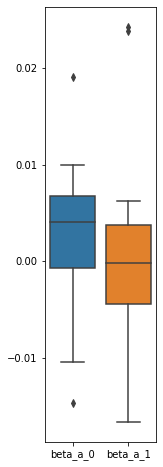

In [156]:
condition = []
for i in range(46):
    condition.append('beta_a_0')
for i in range(46):
    condition.append('beta_a_1')
data = {"value":np.array([beta_a_0,beta_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

<AxesSubplot:>

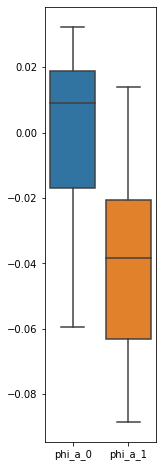

In [157]:
condition = []
for i in range(46):
    condition.append('phi_a_0')
for i in range(46):
    condition.append('phi_a_1')
data = {"value":np.array([phi_a_0,phi_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

<AxesSubplot:>

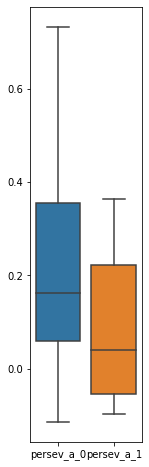

In [158]:
condition = []
for i in range(46):
    condition.append('persev_a_0')
for i in range(46):
    condition.append('persev_a_1')
data = {"value":np.array([persev_a_0,persev_a_1]).reshape(-1,1).squeeze(),
        "condition":condition}
plt.figure(figsize=(2,8))
sns.boxplot(data=data,y='value',x='condition')

In [42]:
beta_a,beta,_,_ = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_sqrt_beta_task2v3.csv')
phi_a,_,phi,_ = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_sqrt_phi_task2v3.csv')
persev_a,_,_,persev = read_parameter_glm_no_gamma_para('./nhb_glm_ru_no_gamma_sqrt_persev_task2v3.csv')
beta_norm = np.divide(beta_a,beta)
phi_norm = np.divide(phi_a,phi)
persev_norm = np.divide(persev_a,persev)
# data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a,
#         'beta_norm':beta_norm,'phi_norm':phi_norm,'persev_norm':persev_norm}
data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a,
        'beta_norm':beta_norm,'phi_norm':phi_norm,'persev_norm':persev_norm}
df = pd.DataFrame(data)

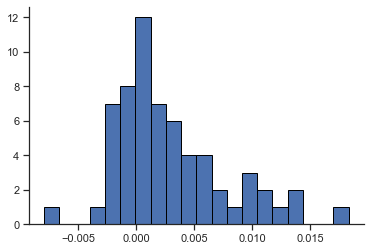

In [43]:
plt.hist(beta_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

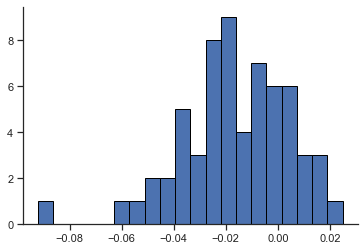

In [44]:
plt.hist(phi_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

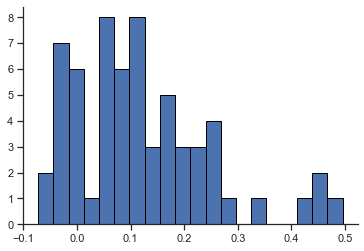

In [45]:
plt.hist(persev_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

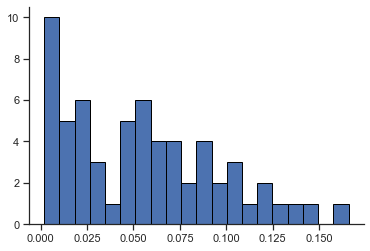

In [46]:
plt.hist(beta,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

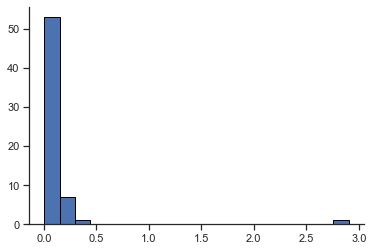

In [47]:
plt.hist(phi,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

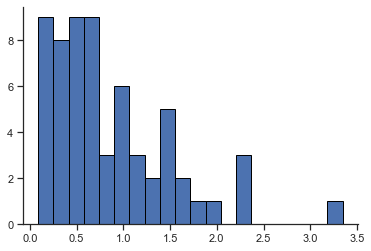

In [48]:
plt.hist(persev,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

In [32]:
t_statistic, p_value = stats.ttest_1samp(beta_norm, 0)
print(p_value)

0.15735784768697506


In [33]:
t_statistic, p_value = stats.ttest_1samp(phi_norm, 0)
print(p_value)

4.045030017082764e-05


In [34]:
t_statistic, p_value = stats.ttest_1samp(persev_norm, 0)
print(p_value)

2.7191605594735604e-06


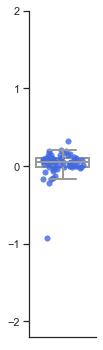

In [28]:
x = (np.random.random((62))-np.ones((62))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["beta_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,beta_norm,s=30,color='royalblue',linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-2.2,2])
sns.set(style='ticks')
sns.despine()

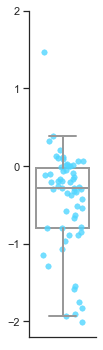

In [31]:
x = (np.random.random((62))-np.ones((62))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["phi_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,phi_norm,s=30,color=(81/255, 214/255, 255/255),linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-2.2,2])
sns.set(style='ticks')
sns.despine()

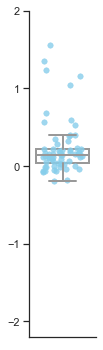

In [30]:
x = (np.random.random((62))-np.ones((62))*0.5)*0.6
plt.figure(figsize=(1.2,6))
sns.boxplot(data=df["persev_norm"],linewidth=2,fliersize=0,color='white')
plt.scatter(x,persev_norm,s=30,color='skyblue',linewidths=0.5,alpha=0.8)
plt.yticks([-3,-2,-1,0,1,2])
plt.xticks([])
plt.ylim([-2.2,2])
sns.set(style='ticks')
sns.despine()

In [24]:
beta_a,phi_a,persev_a,beta_b,phi_b,persev_b = read_parameter_glm_3_para('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')
data = {'beta_a':beta_a,'phi_a':phi_a,'persev_a':persev_a}
df = pd.DataFrame(data)

In [28]:
d = sm.stats.DescrStatsW(beta_a)
print(d.ttest_mean(0))
# import statsmodels.stats.weightstats 
# z,pval = statsmodels.stats.weightstats(data['beta_a'],value=0)
# print(z,pval)

(0.5752436518358337, 0.5672424224030783, 61.0)


In [292]:
beta_a_task1 = [0.00097608, -0.001000131, -0.000395348, 0.007428459, 0.013607663, 0.011833751, 0.001699002, 0.010883782, 0.011808975, 0.00546067, 0.000794419, 0.007767514, -0.001469065, 0.009611183, 0.005569217, 0.005823073, 0.007729267, 0.011634529, 0.006826233, 0.013824823, 0.001741767, 0.012649176, 0.002539273, -0.002076027, 0.017377162, 0.011361612, 0.008048473, 0.003734259, 0.007057873, 0.007342628, -0.000360819, 0.012931463, 0.001081247, 0.009832184, 0.008734755, 0.002251463, -0.000425405, 0.01416426, 0.01370699, 0.015798669, 0.003355362, -0.00061569, 0.006821868, 0.003521461, 0.012306518, 0.008321856]
phi_a_task1 = [-0.016765288, -0.023271977, -0.025077523, -0.01262617, -0.058780819, -0.004680608, -0.007852543, -0.029045234, -0.012808073, 0.014809459, -0.025820274, -0.041756473, -0.04722482, -0.042012111, -0.043637902, -0.029015232, -0.006294179, -0.04593319, -0.048420001, -0.048272497, -0.004992295, -0.022065832, -0.021737275, -0.003236842, -0.045364555, -0.044373222, -0.045237802, -0.069970798, -0.011788373, -0.016073619, 0.011987613, -0.025097504, 0.01892951, -0.052127773, -0.074700645, 0.026985483, -0.00939715, -0.051109949, -0.075901617, -0.040472687, -0.009342589, -0.045157132, -0.036676848, -0.021484073, -0.052577207, -0.049077109]
persev_a_task1 = [0.107634599, 0.106203849, 0.104906043, 0.172990487, 0.499521336, 0.285805225, 0.158954669, 0.18616974, 0.331826009, 0.311706553, 0.321789268, 0.737636471, 0.161406982, 0.333195453, 0.046479939, 0.256077267, 0.200854731, 0.60070845, 0.120949461, 0.418376745, 0.084348457, 0.250232253, 0.206334875, 0.059449977, 0.406852932, 0.285345763, 0.204745443, 0.385691573, 0.179048352, 0.148566255, -0.043264862, 0.148527304, -0.103027371, 0.366675958, 0.711935855, -0.233229929, 0.206527758, 0.522355008, 0.374769025, 0.235136416, 0.125518604, 0.06454168, 0.3281264, 0.329729532, 0.519153106, 0.129862707]

In [293]:
print(get_p_value(beta_a, beta_a_task1))

0.0006421087579476862


In [294]:
print(get_p_value(phi_a, phi_a_task1))

0.006017468498305728


In [295]:
print(get_p_value(persev_a, phi_a_task1))

9.09700043576009e-11


<AxesSubplot:>

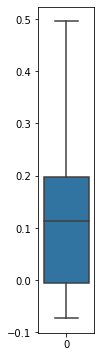

In [331]:
plt.figure(figsize=(1,6))
sns.boxplot(data=df["persev_a"])

In [35]:
beta_a,phi_a,persev_a,beta,phi,persev = read_parameter_glm_3_para('./nhb_glm_ru_no_gamma_sqrt_task2v3.csv')

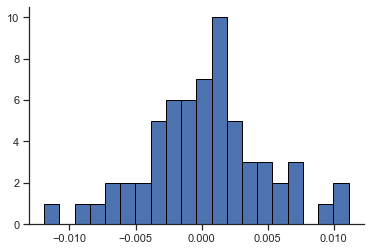

In [36]:
plt.hist(beta_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

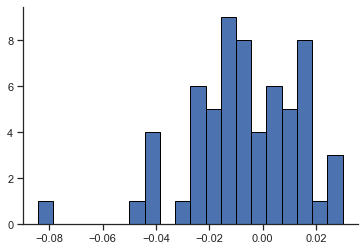

In [37]:
plt.hist(phi_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

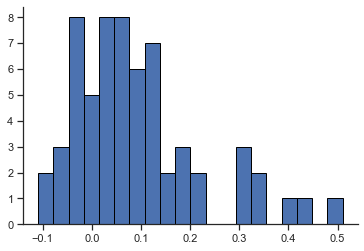

In [38]:
plt.hist(persev_a,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

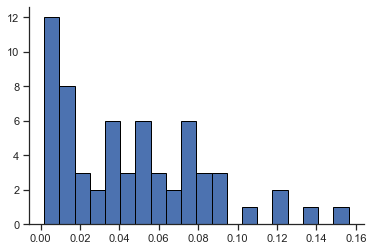

In [39]:
plt.hist(beta,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

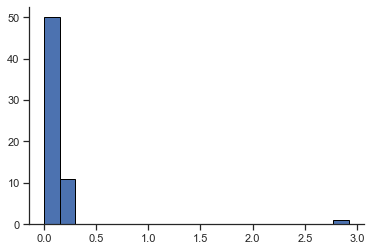

In [40]:
plt.hist(phi,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()

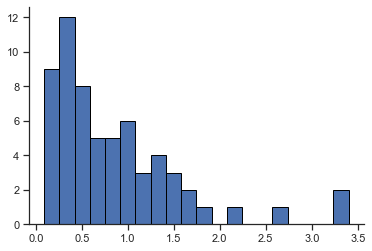

In [41]:
plt.hist(persev,bins=20,edgecolor='black')
sns.set(style='ticks')
sns.despine()